In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Helper function to print VIF value
def getvif(data):
    #Creating a Dataframe for VIF values
    vif = pd.DataFrame()
    #Dropping const column
    temp = data.drop("const",axis=1)
    #Copying feature names
    vif['Features'] = temp.columns
    
    #CAlculating VIF
    vif['VIF'] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    
    #Sorting dataframe in descending order based on VIF values
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [3]:
#Importing Necessary Libraries

import pandas as pd
import numpy as np

#Libraries for data visualiztion
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score


In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Reading Data

In [5]:
#Reading Data Frame
cardf_orig=pd.read_csv("CarPrice_Assignment.csv")

In [6]:
cardf_orig.shape

(205, 26)

In [7]:
cardf_orig.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
cardf_orig.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
cardf_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [10]:
# Checking for null values in columns
cardf_orig.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

No Null values found 

In [11]:
# Checking for null values in rows
cardf_orig.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

No Null values found 

In [12]:
cardf_orig.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


# Checking for duplicate rows

In [13]:
#Seeing if any row is repeated
cardf_orig.duplicated().value_counts()

False    205
dtype: int64

In [14]:
#Since car_ID must unique for each observation thus checking if car_ID is unique for each row
cardf_orig.duplicated("car_ID").value_counts()

False    205
dtype: int64

## Conclusions
1. No duplicate rows found.
2. car_ID is unique for each row

In [15]:
cardf_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [16]:
#By looking at the info above we saw some columns are of type object andneed to be converted to categorical data type
#List of categorical columns
catcols=["car_ID","symboling","CarName","fueltype",
"aspiration","doornumber","carbody","drivewheel",
"enginelocation","enginetype","cylindernumber","fuelsystem"]

In [17]:
#Changing the data type of columns to category
cardf_orig[catcols]=cardf_orig[catcols].astype("category")

In [18]:
cardf_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null category
symboling           205 non-null category
CarName             205 non-null category
fueltype            205 non-null category
aspiration          205 non-null category
doornumber          205 non-null category
carbody             205 non-null category
drivewheel          205 non-null category
enginelocation      205 non-null category
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null category
cylindernumber      205 non-null category
enginesize          205 non-null int64
fuelsystem          205 non-null category
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 no

# Analysis of Categorical Columns

# Checking Carname Column
Carname per se is of less imprtance in predicting the price of a car.However Car Company can certainly have an effect on price.Therefore we are extracting the company name from the carname column and cleaning it up

In [19]:
#USing lambda Function to extract company name from carname column
cardf_orig["carcompany"]=cardf_orig["CarName"].apply(lambda x:x.split(" ")[0])

#Printimg values with their count in alphabetical order
print(cardf_orig["carcompany"].value_counts().sort_index())

Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: carcompany, dtype: int64


#### There are some clear mis spelling thus we need to correct them.
1. 3 versions of volkswagen namely vw,vokswagen,volkswagen.
2. 2 spellings for toyota
3. Spelling mistake of mazda to maxda
4. Spelling mistake of porsche
5. Their is mistake with nissan company it has two versions Nissan and nissan

In [20]:
#Replacing incorrect values with correct ones

cardf_orig["carcompany"]=cardf_orig["carcompany"].replace({"maxda":"mazda","porcshce":"porsche","toyouta":"toyota",
                                                           "vokswagen":"volkswagen","vw":"volkswagen","Nissan":"nissan"})

In [21]:
#Checking if all issues are dealt with
cardf_orig["carcompany"].value_counts().sort_index()

alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
mazda          17
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porsche         5
renault         2
saab            6
subaru         12
toyota         32
volkswagen     12
volvo          11
Name: carcompany, dtype: int64

## Checking Categorical column fueltype

In [22]:
#Checking values
cardf_orig["fueltype"].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [23]:
#Checking data type
cardf_orig["fueltype"].dtype

CategoricalDtype(categories=['diesel', 'gas'], ordered=False)

### Conclusions
1. No Missing values
2. All values are proper i.e no spelling error or unwanted values
3. Correct Data Type

## Checking Categorical column aspiration

In [24]:
cardf_orig["aspiration"].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [25]:
cardf_orig["aspiration"].dtype

CategoricalDtype(categories=['std', 'turbo'], ordered=False)

### Conclusions
1. No Missing values
2. All values are proper i.e no spelling error or unwanted values
3. Correct Data Type


## Checking Categorical column doornumber

In [26]:
cardf_orig["doornumber"].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [27]:
#String values like shown above cannot be used for model building thus we should convert them to appropriate intergers

#Mapping String values to numerical values 
cardf_orig["doornumber"]=cardf_orig["doornumber"].map({"two":2,"four":4})

In [28]:
#Checking if values are mapped correctly
cardf_orig["doornumber"].value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [29]:
#checking data type
cardf_orig["doornumber"].dtypes

dtype('int64')

In [30]:
#Categorcal data type is more appropriate than  numerical for this column
cardf_orig["doornumber"]=cardf_orig["doornumber"].astype("category")
print(cardf_orig["doornumber"].dtype)

category


### Conclusions
1. No Missing values
2. All values are proper i.e no spelling error or unwanted values.
3. Data Issues are dealt with.
4. Correct Data Type


## Checking Categorical column carbody

In [31]:
#Checking values in carbody column
cardf_orig["carbody"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [32]:
#Checking data type
cardf_orig["carbody"].dtype
#The data type categorical is more appropriate for this 

CategoricalDtype(categories=['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'], ordered=False)

### Conclusions
1. No Missing values
2. All values are proper i.e no spelling error or unwanted values.
3. Data Issues are dealt with.
4. Correct Data Type


## Checking Categorical column drivewheel

In [33]:
#Checking values in drive wheel column
cardf_orig["drivewheel"].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [34]:
#Checking data type
cardf_orig["drivewheel"].dtype
#A categorical data type is more appropriate

CategoricalDtype(categories=['4wd', 'fwd', 'rwd'], ordered=False)

### Conclusions
1. No Missing values
2. No Data Issues are dealt with.



## Checking Categorical column enginelocation

In [35]:
#Checking values in engine location
cardf_orig["enginelocation"].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [36]:
#Chekcing data type
cardf_orig["enginelocation"].dtypes

CategoricalDtype(categories=['front', 'rear'], ordered=False)

### Conclusions
1. No Missing values
2. No Data Issues


## Checking Categorical column enginetype

In [37]:
#checking values
cardf_orig["enginetype"].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [38]:
#Checkingdata type
cardf_orig["enginetype"].dtype

CategoricalDtype(categories=['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], ordered=False)


## Checking Categorical column cylindernumber

In [39]:
#Checking values in cylinder number column
cardf_orig["cylindernumber"].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [40]:
#String values are not suitable for calculation thus we are converting them to integer

#Mapping string values to int for calculation purposes
cardf_orig["cylindernumber"]=cardf_orig["cylindernumber"].map({"two":2,"three":3,"four":4,"five":5,"six":6,"eight":8,"twelve":12})

In [41]:
cardf_orig["cylindernumber"].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64

In [42]:
cardf_orig["cylindernumber"].dtype

dtype('int64')

In [43]:
#Categorcal data type is more appropriate than  numerical for this column
cardf_orig["cylindernumber"]=cardf_orig["cylindernumber"].astype("category")
print(cardf_orig["cylindernumber"].dtype)

category


### Conclusions
1. No Missing values
2. All values are proper i.e no spelling error or unwanted values.
3. Data Issues are dealt with.
4. Correct Data Type


## Checking Categorical column fuelsystem

In [44]:
#Checking values 
cardf_orig["fuelsystem"].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [45]:
cardf_orig["fuelsystem"].dtype

CategoricalDtype(categories=['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi',
                  'spfi'],
                 ordered=False)

In [46]:
cardf_orig["fuelsystem"]=cardf_orig["fuelsystem"].astype("category")

In [47]:
cardf_orig["fuelsystem"].dtype

CategoricalDtype(categories=['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi',
                  'spfi'],
                 ordered=False)

### Conclusions
1. No Missing values
2. All values are proper i.e no spelling error or unwanted values.

# Visualising the data

In [48]:
cardf_orig.head(1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero


In [49]:
#List of numeric columns
numcols=["wheelbase","carlength","carwidth","carheight",
"curbweight","enginesize","boreratio","stroke",
"compressionratio","horsepower","peakrpm","citympg",
"highwaympg","price"]
#List of categorical columns
catcols=["symboling","fueltype","doornumber",
"aspiration","carbody","drivewheel",
"enginelocation","enginetype","fuelsystem","cylindernumber"]

## Visualizing Numerical Columns with price

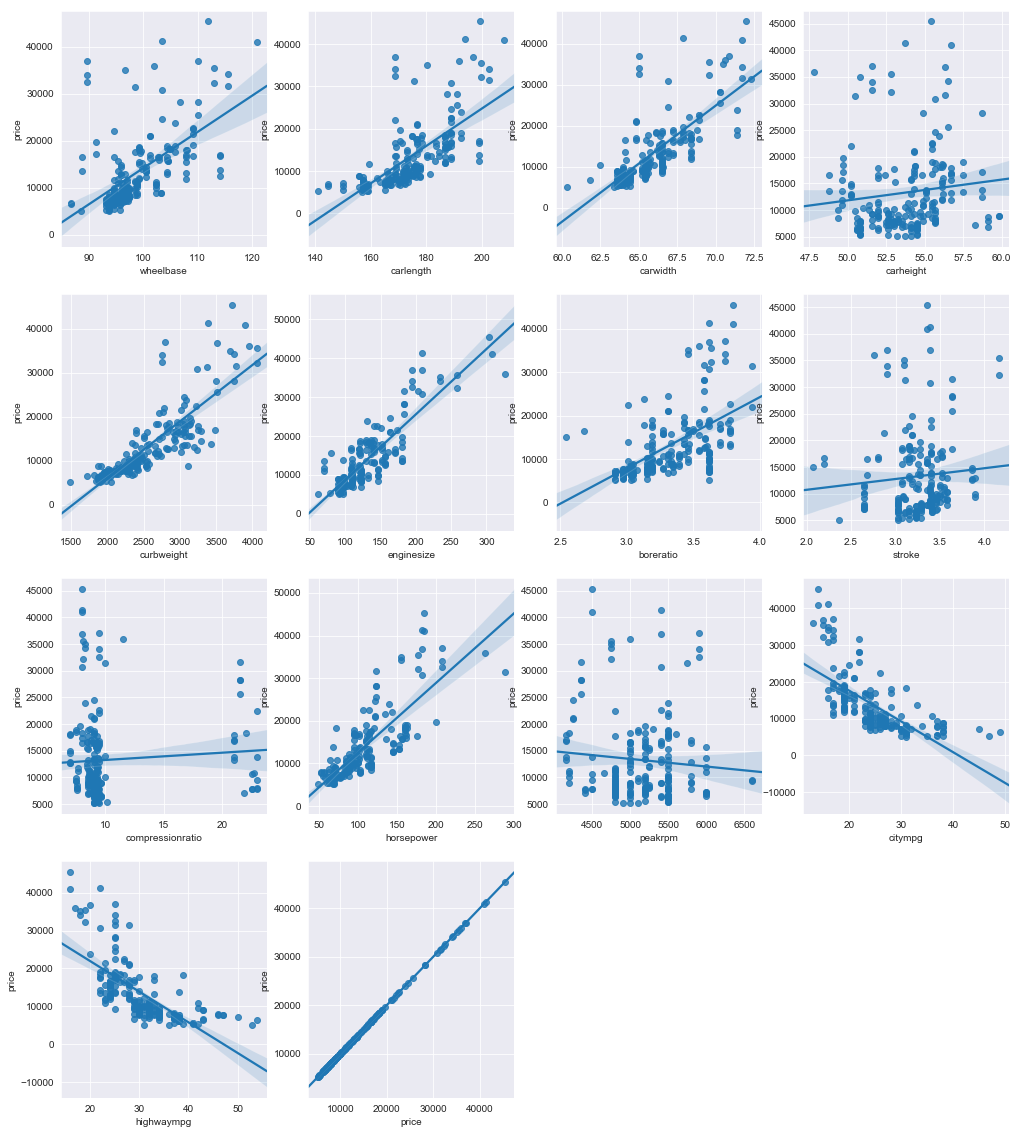

In [50]:
#plotting numerical columns against price
k=1
plt.figure(figsize=(17,20))
for i in numcols:
    plt.subplot(4,4,k)
    sns.regplot(y="price",x=i,data=cardf_orig)
    plt.xlabel(i)
    plt.ylabel("price")
    k=k+1

### Conclusions
1. Variables like carlength,carwidth,curbweight,horsepower,enginesize form a close linear relationship with price.
2. Variables like highwaympg,citympg are also linearly related with target variable but they are negatively correlated with target variable price
3. Variables are stroke,carheight,compression ratio seems not to form a linear relationship with target variable.

Note:` We are concluding this based on how line is fitted through data for more accurate results we have to develop the  model`

# Checking Target column

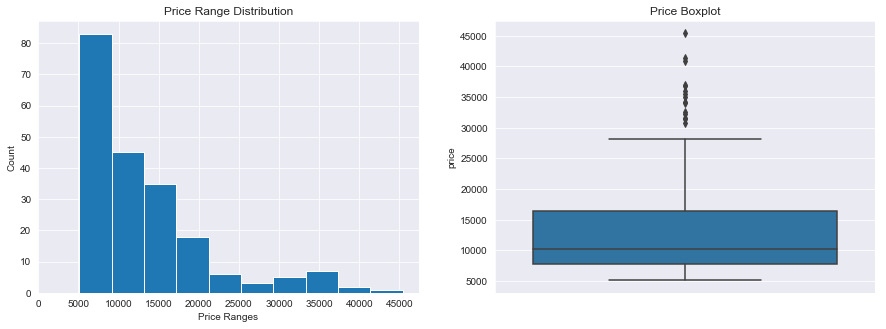

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ylabel("Count")
plt.title("Price Range Distribution")
plt.hist(cardf_orig["price"])
plt.xlabel("Price Ranges")
plt.xticks(range(0,50000,5000))
plt.subplot(1,2,2)
plt.title("Price Boxplot")
sns.boxplot(y=cardf_orig["price"])
plt.show()

## Insights
1. Price Column have some outliers,we think they may be because of some brands.In any case these will be taken care off as we are  using minmax scaling
2. Most of the cars are in price range less than 15000
3. Majority of the price is spread between 8000 to 17000
4. Minimum carprice is 5000

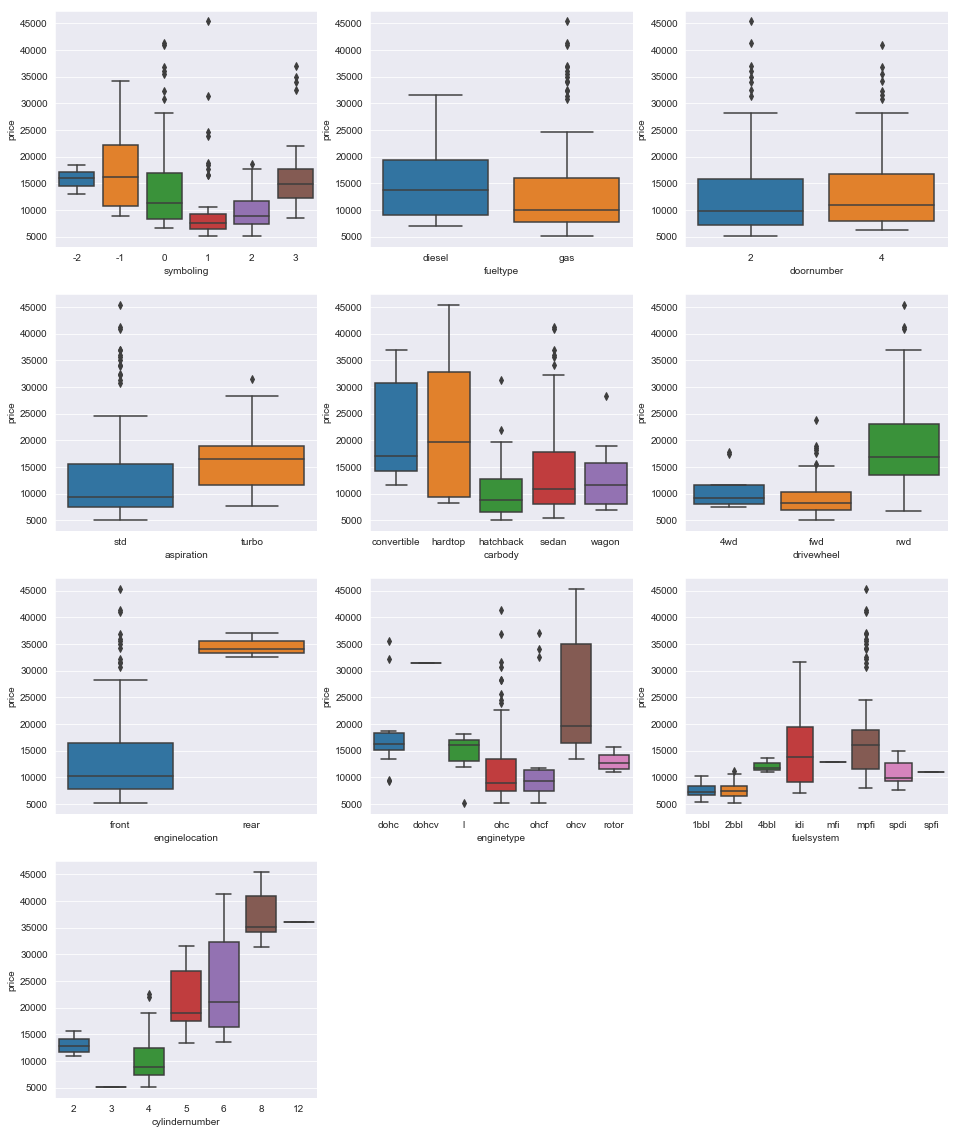

In [52]:
#Plotting Categorical variables
k=1
plt.figure(figsize=(16,20))
for i in catcols:
    plt.subplot(4,3,k)
    sns.boxplot(y="price",x=i,data=cardf_orig)
    k=k+1


1. Diesel Cars are more expensive than gas cars.
2. Door number doesnt have much effect on price
3. Cars with high number of cylinders are generally expensive
4. Cars with turbo aspiration are expensive
5. Cars with hardtop body have high prices
6. rwd drivewheel cars are more costly than fwd and 4wd
7. Cars having engine in the rear are more expensive

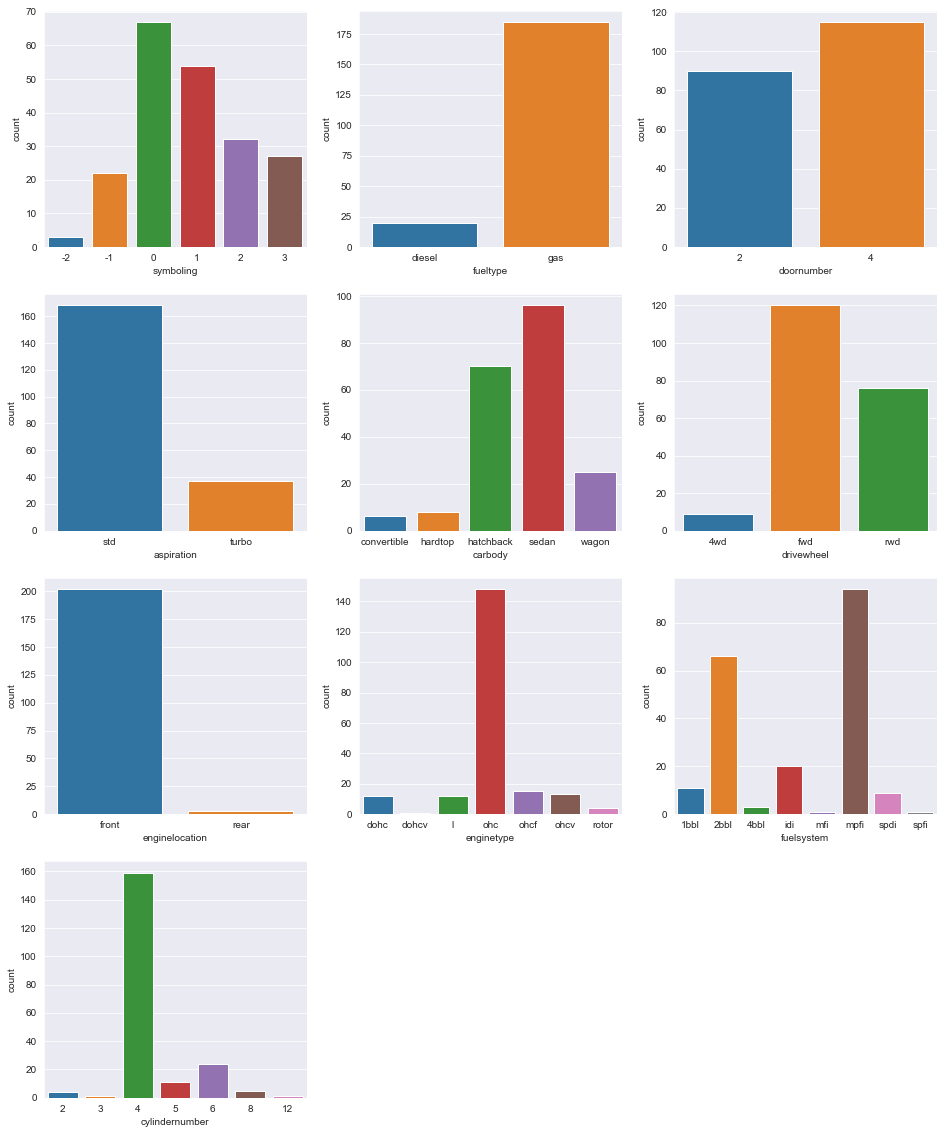

In [53]:
#Plotting Categorical variables
k=1
plt.figure(figsize=(16,20))
for i in catcols:
    plt.subplot(4,3,k)
    sns.countplot(cardf_orig[i].sort_values())
    k=k+1

1. Gas cars are preferred over diseal cars.This may be because as we saw earlier diesel cars are expensive
2. Cars with 4 cylinders are very popular.We think people choose 4 cylinder car because it is a balanced choice between quality and price(Cars with high cylinders are expensive)
3. More people buy cars with enfgine in the front
4. Sedan cars are popular
5. More people buy cars with std aspiration rather than turbo one.
6. Earlier we saw that door number do not have much effect on price but the chart above shows that people tend to buy 4 door cars
7. Count of Symboling column shows that people buy cars which are neither too risky nor too safe(Insurance Risk wise).


### Plotting Car Company

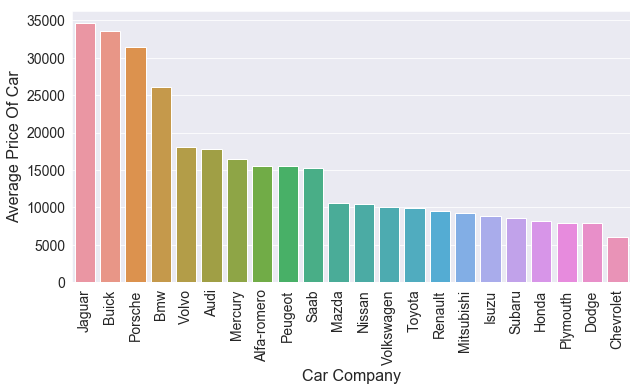

In [54]:
#Plotting Average PRice of Car of a particular Company
plt.figure(figsize=(10,5))


#Grouping the cars based on company name and finding mean price of a particular company
temp=cardf_orig.groupby("carcompany")["price"].mean()
#Soritng all the companies in decreasing order of average price 
temp=temp.sort_values(ascending=False)
#Capitalizing Every Company name
temp.index=[i.capitalize() for i in temp.index]
#Plotting barplot
sns.barplot(y=temp.values,x=temp.index)

#Setting xlabel and yabel
plt.ylabel("Average Price Of Car",fontsize=16)
plt.xlabel("Car Company",fontsize=16)

#Setting font size of x and y ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#Setting x ticks rotation
plt.xticks(rotation=90)
plt.show()

## Insights
1. Jaguar,Buick,Porche,BMW are companies which make high end(Expensive) cars
2. Volvo Audi,Mercury,Saab make cars which are low high end.
3. Mazda,Nissan,Volkswagen make medium ranged cars which are economical.
4. Honda,Plymouth,Dodge,Chevrolet,Toyota etc make low priced cars 

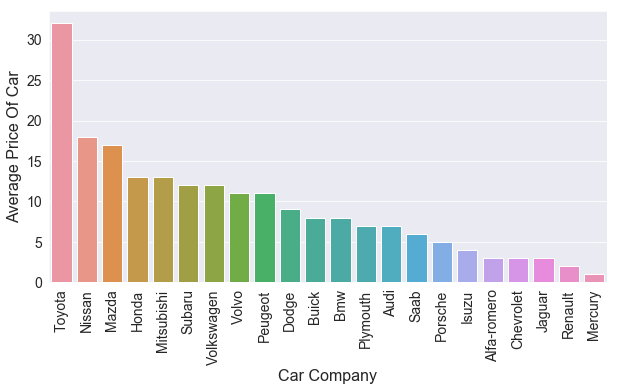

In [55]:
#Plotting Count of Car of a particular Company

plt.figure(figsize=(10,5))
#Setting x ticks rotation
plt.xticks(rotation=90)

#Grouping rows based on carcompany and finding count
temp=cardf_orig.groupby("carcompany")["price"].count()
temp=temp.sort_values(ascending=False)
#CApitalizing first letter of every COmpany name
temp.index=[i.capitalize() for i in temp.index]
#Plotting values
sns.barplot(y=temp.values,x=temp.index)

#Setting x and y labels
plt.ylabel("Average Price Of Car",fontsize=16)
plt.xlabel("Car Company",fontsize=16)

#Setting font size of xticks and yticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Insights
1. Toyota Cars have very high demand followed by Nissan and Mazda. 
2. Mercury,Renault Saab,Porche are not very popular among people.
3. We saw earlier that Jaguar cars are the most expensive ones but their demand is vey low
4. BMW,Buick,Volvo cars are expensive cars (not as expensive as jaguar but still high end cars) and their demand is also comparable.
5. We believe that cars mentioned in point 4 are suitable for manufacturing because they are pricey and in moderate demand 

## Deeper Analysis 

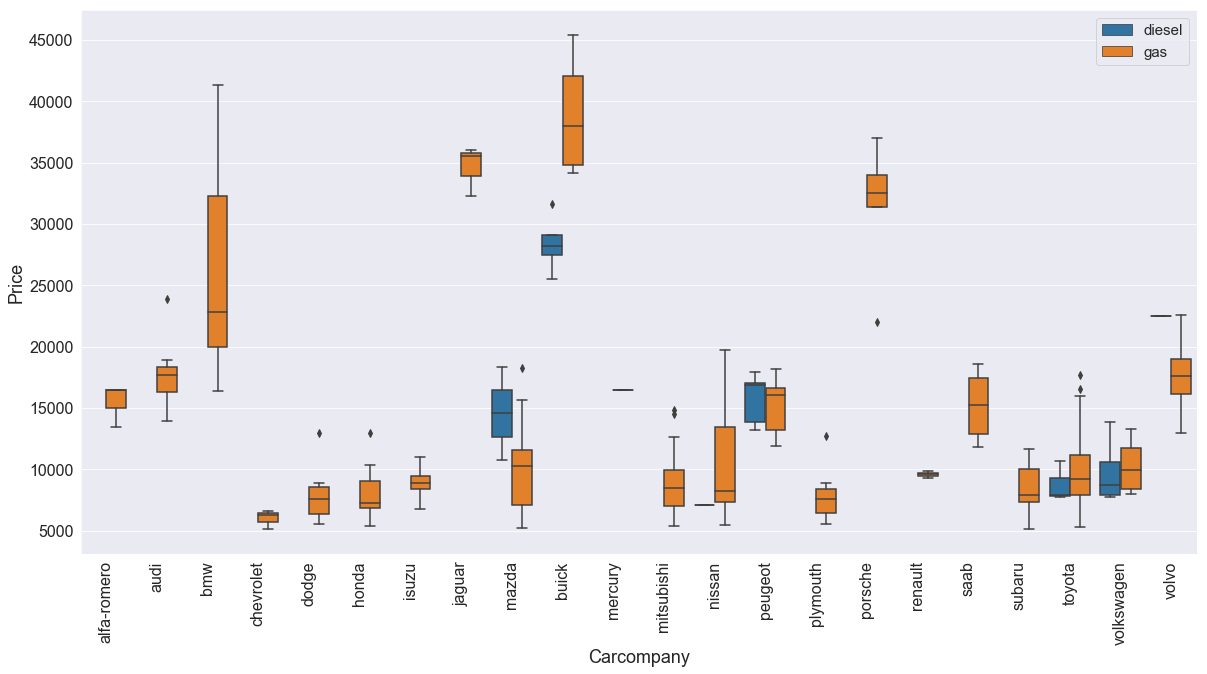

In [56]:
#Plotting price and carcompany with hue as fueltype
plt.figure(figsize=(20,10))
#Setting x ticks rotation
plt.xticks(rotation=90)
#Plotting boxplot
sns.boxplot(y="price",x="carcompany",hue="fueltype",data=cardf_orig)

#Setting Labels and Font Size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Carcompany",fontsize=18)
plt.ylabel("Price",fontsize=18)
plt.legend(fontsize=15)
plt.show()

## Insights
Very Few companies make diesel cars.Maybe this is why diesel cars are more expensive.

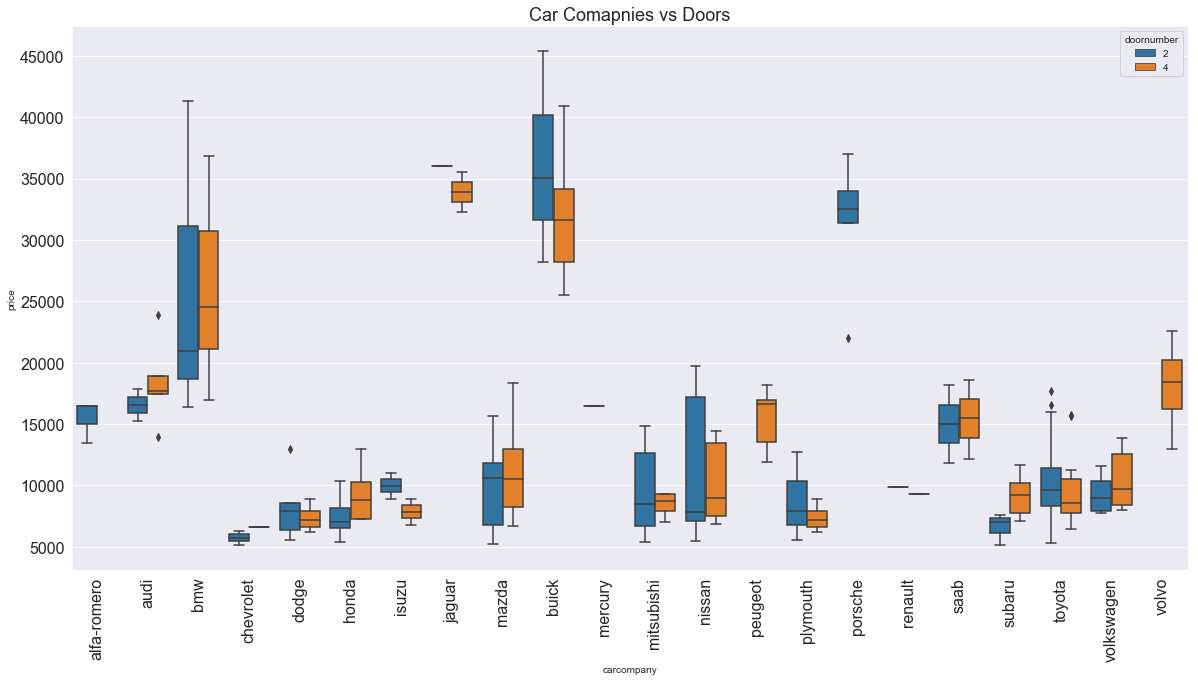

In [57]:
#Plotting price and carcompany
plt.figure(figsize=(20,10))
#Setting x ticks rotation
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
plt.title("Car Comapnies vs Doors",fontsize=18)
#Plotting boxplot
sns.boxplot(y="price",x="carcompany",data=cardf_orig,hue="doornumber")
plt.show()

## Insights
Earlier we saw that door number does not affect the price of a car in general.However when we look within companies this is not the case.But we still cannot see a common pattern among different companies

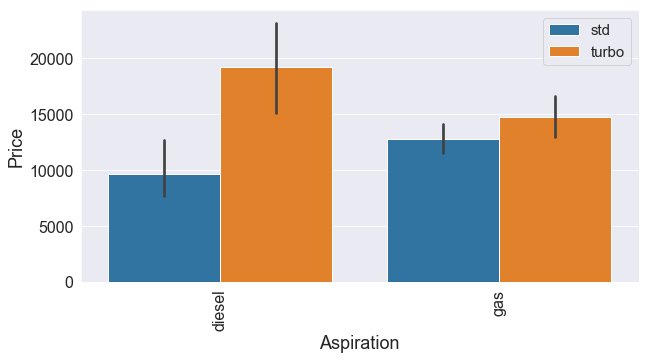

In [58]:
#Plotting price and carcompany
plt.figure(figsize=(10,5))
#Setting x ticks rotation
plt.xticks(rotation=90)
#Plotting boxplot
sns.barplot(y="price",x="fueltype",data=cardf_orig,hue="aspiration")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Aspiration",fontsize=18)
plt.ylabel("Price",fontsize=18)
plt.legend(fontsize=15)
plt.show()

## Insights
1. From the charts we perpared earlier we saw that diesel cars are more expensive than gas cars and cars with turbo aspiration cost more than cars with std aspiration.
2. From the chart above we can say that the abservations that we made about aspiration hold true for both diesel and gas cars.


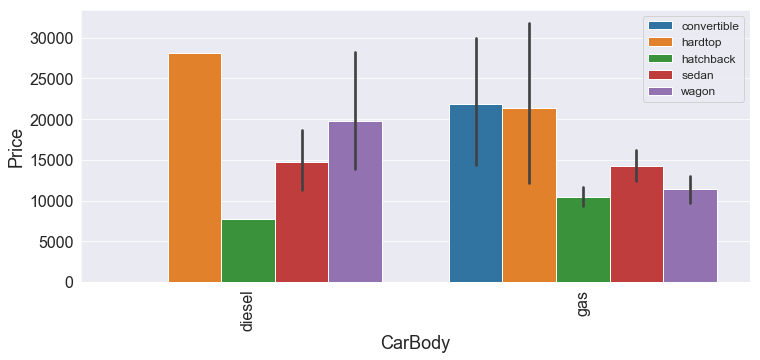

In [59]:
#Plotting price and carcompany with hue as fueltype
plt.figure(figsize=(12,5))
#Setting x ticks rotation
plt.xticks(rotation=90)
#Plotting barplot
sns.barplot(y="price",x="fueltype",data=cardf_orig,hue="carbody")

#Setting fonts and labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("CarBody",fontsize=18)
plt.ylabel("Price",fontsize=18)
plt.legend(fontsize=12)
plt.show()

## Insights
1. Their are no diesel cars with convertible body type i.e all convertible cars are gas based.
2. Even among diesel and gas based cars hardtop body cars are still most expensive.
3. Convertible cars are as expensive as gas based hardtop cars. 
 

# Binning Symboling Column
We are creating a new column called risk column which would tell wether car is at insurance risk,safe or neutral.

In [60]:

cardf_orig["Risk"]=cardf_orig["symboling"].map({-2:"Safe",-1:"Safe",0:"Neutral",1:"Risky",2:"Risky",3:"Risky"})

In [61]:
cardf_orig.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany,Risk
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,Risky
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,Risky
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Risky
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,Risky
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,Risky


In [62]:
#Checking Data Type
cardf_orig["Risk"].dtype

dtype('O')

In [63]:
#Changing data type to categorical
cardf_orig["Risk"]=cardf_orig["Risk"].astype("category")

In [64]:
#Checking Data Type
cardf_orig["Risk"].dtype

CategoricalDtype(categories=['Neutral', 'Risky', 'Safe'], ordered=False)

# Create a new column if car is in demand among people or not

1. From our bussiness understanding we are creating a new column called demand_rating.
2. This column will contain values from 1 to 4.
3. 4 means that a company is very popular and in demand
4. 1 means that the company is not much in demand
5. These ratings are calculated based on count of how many cars are sold of each company.

In [65]:
# First we will create a temp data frame.This dataframe will contain count of cars of each company

#Grouping original data frame based on car company and using count as aggregate function.
temp=cardf_orig.groupby("carcompany")[["car_ID"]].count().sort_values(by="car_ID",ascending=False)

#Resetting Index
temp=temp.reset_index()
#Renaming Column name
temp=temp.rename(columns={"car_ID":"count"})
temp.head()

,carcompany,count
0,toyota,32
1,nissan,18
2,mazda,17
3,mitsubishi,13
4,honda,13


In [66]:
#Creating a New column in temp dataframe.We are creating 4 bins based on values of count column
temp["demand_rating"]=pd.qcut(temp["count"], 4, labels=[1, 2, 3,4])
temp.head(8)

,carcompany,count,demand_rating
0,toyota,32,4
1,nissan,18,4
2,mazda,17,4
3,mitsubishi,13,4
4,honda,13,4
5,volkswagen,12,3
6,subaru,12,3
7,peugeot,11,3


In [67]:
#Performing a inner merge on temp and cardf_orig data frame based on carcompany value
cardf_orig=pd.merge(left_on="carcompany",right_on="carcompany",how="inner",left=cardf_orig,right=temp)

In [68]:
#Checking if dataframe merged perfectly
cardf_orig.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany,Risk,count,demand_rating
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,Risky,3,1
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,Risky,3,1
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Risky,3,1
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,Risky,7,2
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,Risky,7,2


In [69]:
#We dont need count variable so we are dropping it
cardf_orig=cardf_orig.drop("count",axis=1)

In [70]:
cardf_orig["demand_rating"]=cardf_orig["demand_rating"].astype("int")
#Checking data
cardf_orig.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany,Risk,demand_rating
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,Risky,1
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,Risky,1
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Risky,1
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,Risky,2
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,Risky,2


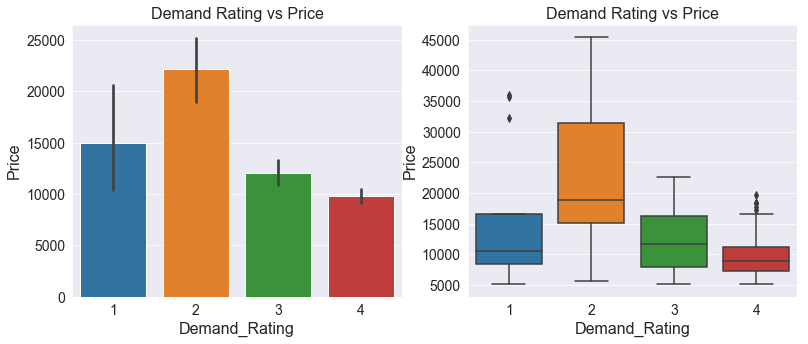

In [71]:
#Plotting Demand Rating and Price
plt.figure(figsize=(13,5))
#Plotting Barplot
plt.subplot(1,2,1)
sns.barplot(x=cardf_orig["demand_rating"],y=cardf_orig["price"])
#Setting title,xlabels and ylabels
plt.title("Demand Rating vs Price",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Demand_Rating",fontsize=16)
plt.ylabel("Price",fontsize=16)
#Plotting Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=cardf_orig["demand_rating"],y=cardf_orig["price"])
#Setting title,xlabels and ylabels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Demand Rating vs Price",fontsize=16)
plt.xlabel("Demand_Rating",fontsize=16)
plt.ylabel("Price",fontsize=16)
plt.show()

## Insights
1. Although cars with 4 rating are in high demand but their average price is lowest.
2. Cars with rating 1 are very low in demand but their average price is high
3. Cars with rating 2 are in considerable demand and their average price is also highest.
4. Companies with 2 rating are a perfect balance of demand and cost.They generate a good revenue(because of high cost) and also are in good demand

# Data Preparation for Modelling

## Creating Dummy Variables

In [72]:
#Creating a list of columns for which we need to crete dummy columns
dumlist=["fueltype","aspiration","doornumber","carbody","drivewheel",
         "enginelocation","enginetype","cylindernumber","fuelsystem",
        "carcompany","Risk"]

In [73]:
#Creating Dummy variables for columns mentioned above.
dummydf=pd.get_dummies(cardf_orig[dumlist],drop_first=True)

In [74]:
#Checking DAta frame
dummydf.head()

,fueltype_gas,aspiration_turbo,doornumber_4,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_3,cylindernumber_4,cylindernumber_5,cylindernumber_6,cylindernumber_8,cylindernumber_12,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carcompany_audi,carcompany_bmw,carcompany_buick,carcompany_chevrolet,carcompany_dodge,carcompany_honda,carcompany_isuzu,carcompany_jaguar,carcompany_mazda,carcompany_mercury,carcompany_mitsubishi,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo,Risk_Risky,Risk_Safe
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [75]:
#Concating dummy variable dataframe with original dataframe and creatinga  new data frame cardf
cardf=pd.concat((cardf_orig,dummydf),axis=1)

In [76]:
cardf.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany,Risk,demand_rating,fueltype_gas,aspiration_turbo,doornumber_4,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_3,cylindernumber_4,cylindernumber_5,cylindernumber_6,cylindernumber_8,cylindernumber_12,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carcompany_audi,carcompany_bmw,carcompany_buick,carcompany_chevrolet,carcompany_dodge,carcompany_honda,carcompany_isuzu,carcompany_jaguar,carcompany_mazda,carcompany_mercury,carcompany_mitsubishi,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo,Risk_Risky,Risk_Safe
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,Risky,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,Risky,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Risky,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,Risky,2,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,Risky,2,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Dropping Columns
We will use cardf for further modelling.However before we proceed further there are some columns that we should drop
1. We will drop all the columns for which dummy variables are created
2. Drop car_ID as it has no role in modelling
3. Drop Carname as it will be of no further use

In [77]:
#Dropping car_ID and carName
cardf=cardf.drop(["car_ID","CarName"],axis=1)

In [78]:
#Visualising dataframe
cardf.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany,Risk,demand_rating,fueltype_gas,aspiration_turbo,doornumber_4,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_3,cylindernumber_4,cylindernumber_5,cylindernumber_6,cylindernumber_8,cylindernumber_12,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carcompany_audi,carcompany_bmw,carcompany_buick,carcompany_chevrolet,carcompany_dodge,carcompany_honda,carcompany_isuzu,carcompany_jaguar,carcompany_mazda,carcompany_mercury,carcompany_mitsubishi,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo,Risk_Risky,Risk_Safe
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,Risky,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,Risky,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Risky,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,Risky,2,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,Risky,2,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [79]:
#Dropping all columns for which dummy variables are created
cardf=cardf.drop(dumlist,axis=1)

In [80]:
#Checking if columns are dropped successfully
cardf.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,demand_rating,fueltype_gas,aspiration_turbo,doornumber_4,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_3,cylindernumber_4,cylindernumber_5,cylindernumber_6,cylindernumber_8,cylindernumber_12,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carcompany_audi,carcompany_bmw,carcompany_buick,carcompany_chevrolet,carcompany_dodge,carcompany_honda,carcompany_isuzu,carcompany_jaguar,carcompany_mazda,carcompany_mercury,carcompany_mitsubishi,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo,Risk_Risky,Risk_Safe
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,2,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,2,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


We also need to drop symboling as we already have info in Risk column

In [81]:
#Dropping Symboling column
cardf=cardf.drop(["symboling"],axis=1)

In [82]:
#Checking final dataframe before splitting it into train and test set
cardf.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,demand_rating,fueltype_gas,aspiration_turbo,doornumber_4,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_3,cylindernumber_4,cylindernumber_5,cylindernumber_6,cylindernumber_8,cylindernumber_12,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carcompany_audi,carcompany_bmw,carcompany_buick,carcompany_chevrolet,carcompany_dodge,carcompany_honda,carcompany_isuzu,carcompany_jaguar,carcompany_mazda,carcompany_mercury,carcompany_mitsubishi,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo,Risk_Risky,Risk_Safe
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,2,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,2,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Splitting Data into train and test set

In [83]:
#Splitting data into training and test data set
#We also set a random state so that we get same split every time we run the command
train_df,test_df=train_test_split(cardf,train_size=.7,random_state=100)

In [84]:
#Checking Shape
train_df.shape

(143, 67)

In [85]:
#Checking Shape
test_df.shape

(62, 67)

In [86]:
#Checking Shape
cardf.shape

(205, 67)

# Scaling Train data
1. Here we are using minmax scaler to scale our data


In [87]:
#List of columns to scale
numcols=["wheelbase","carlength","carwidth","carheight","curbweight",
         "enginesize","boreratio","stroke","compressionratio","horsepower",
        "peakrpm","citympg","highwaympg","price","demand_rating"]

In [88]:
#Scaling Train data

#Initializing scaler object
scaler=MinMaxScaler()

#Scaling training data
train_df[numcols]=scaler.fit_transform(train_df[numcols])

C:\Users\Kush\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [89]:
#Cheking dataframe
train_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,demand_rating,fueltype_gas,aspiration_turbo,doornumber_4,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_3,cylindernumber_4,cylindernumber_5,cylindernumber_6,cylindernumber_8,cylindernumber_12,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carcompany_audi,carcompany_bmw,carcompany_buick,carcompany_chevrolet,carcompany_dodge,carcompany_honda,carcompany_isuzu,carcompany_jaguar,carcompany_mazda,carcompany_mercury,carcompany_mitsubishi,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo,Risk_Risky,Risk_Safe
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,0.333333,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,0.333333,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,1.000000,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,0.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,0.666667,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [90]:
#Checking if columns are properly scaled by looking at min and max values
train_df.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,demand_rating,fueltype_gas,aspiration_turbo,doornumber_4,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_3,cylindernumber_4,cylindernumber_5,cylindernumber_6,cylindernumber_8,cylindernumber_12,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carcompany_audi,carcompany_bmw,carcompany_buick,carcompany_chevrolet,carcompany_dodge,carcompany_honda,carcompany_isuzu,carcompany_jaguar,carcompany_mazda,carcompany_mercury,carcompany_mitsubishi,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo,Risk_Risky,Risk_Safe
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310,0.692308,0.909091,0.181818,0.559441,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.006993,0.741259,0.062937,0.132867,0.020979,0.006993,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.090909,0.0,0.062937,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958,0.545455,0.104895
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682,0.338174,0.288490,0.387050,0.498199,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.083624,0.439483,0.243703,0.340624,0.143818,0.083624,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.288490,0.0,0.243703,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198,0.499680,0.307495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0

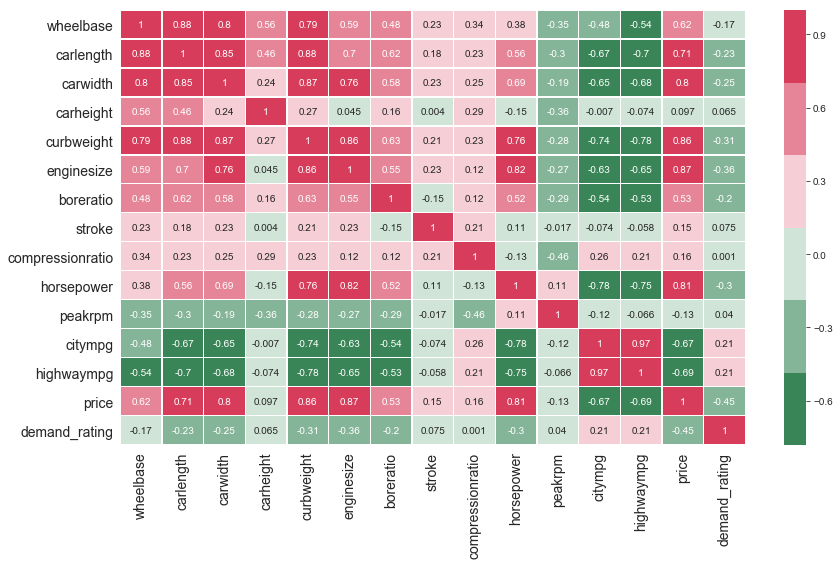

In [91]:
#Plotting a heatmap of all numeric columns in train data frame to see correlations

#Setting figure size
plt.figure(figsize=(14,8))

#Setting font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#Plotting heatmap
sns.heatmap(round(train_df[numcols].corr(),3),annot=True,cmap=sns.diverging_palette(140, 5),linewidths=.5)
plt.show()

## Insights
1. High Positive correlation is observed between price and  carlength,carwidth,carweight,enginesize,horsepower.
2. High Negative correlation is observed between citympg,highwaympg.
3. We must keep those correlations in mind while exploring model features
4. carweight,carwidth,enginesize and wheelbase are highly correlated with most of the variables.We must check these variables for multicollinearity

## Dividing into X and Y for model building

In [92]:
#Creating x and y of training set
y_train=train_df.pop("price")
X_train=train_df

In [93]:
# Running RFE with the output number of the variable equal to 10
lm1 = LinearRegression()
lm1.fit(X_train, y_train)

rfe = RFE(lm1, 10)             
rfe = rfe.fit(X_train, y_train)

In [94]:
#Checking which columns did rfe selected
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_3',
       'cylindernumber_12', 'carcompany_bmw', 'carcompany_porsche'],
      dtype='object')

In [95]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [96]:
#Adding a constant term because we are using statsmodels
X_train_sm=sm.add_constant(X_train_rfe)

In [97]:
#Fitting statsmodels and printing summary and VIF values
lm=sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())
print(getvif(X_train_sm))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.21e-64
Time:                        23:42:57   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1594    

## Steps taken
1. We are removing cylindernumer_12 from the model because it has very high  p value.
2. Their are also variables with very high VIF values but first we are trying to include only significant variables in our model.

In [98]:
#Dropping cylindernumber_12
X_train_sm=X_train_sm.drop("cylindernumber_12",axis=1)

#REbuilding the model withour cylindernumber_12 and printing summary statistics
lm=sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())
print(getvif(X_train_sm))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.18e-65
Time:                        23:42:57   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1587    

## Steps taken
1. All the variables in the above model are significant and model itself is significant which is evident from its F value.
2. Their are lots of variables with high VIF values.This shows multicollinearity. 
3. We are removing curbweight from the model because it has very high  VIF value.
4. Once we remove that we will rebuild the model and reevaluate it.
5. We also noticed that R-Square value of this model and previous model are same so model efficiency has not decreased

In [99]:
#Dropping curbweight
X_train_sm=X_train_sm.drop("curbweight",axis=1)

#Rebuilding the model
lm=sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())
print(getvif(X_train_sm))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.01e-63
Time:                        23:42:57   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1778    

## Steps taken
1. Model r-squared value has decreased.
2. Parameters like boreratio and carcompapy_porche have become insignificant
3. carwidth,enginesize and boreratio have veryhigh VIF values indicating multicollinearity
4. We will first remove boreratio because of its high p value and then again reevaluate the model to check what variables are significant and which variables still have high VIF


In [100]:
#Dropping boreratio
X_train_sm=X_train_sm.drop("boreratio",axis=1)

#Rebuilding model
lm=sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())
print(getvif(X_train_sm))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     171.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.04e-64
Time:                        23:42:57   Log-Likelihood:                 180.65
No. Observations:                 143   AIC:                            -345.3
Df Residuals:                     135   BIC:                            -321.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1925    

## Steps taken
1. Model r-squared value has decreased.
2. Parameter carcompapy_porche is still insignificant
3. carwidth,enginesize  have very high VIF values indicating multicollinearity
4. We will first remove carcompapy_porche because of its high p value and then again reevaluate the model to check what variables are significant and which variables still have high VIF


In [101]:
#Dropping carcompany porche
X_train_sm=X_train_sm.drop("carcompany_porsche",axis=1)

#Rebuilding model
lm=sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())
print(getvif(X_train_sm))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.62e-64
Time:                        23:42:57   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1976    

## Steps taken
1. Model r-squared value has decreased slightly.
2. All parameters are significant
3. carwidth,enginesize  have very high VIF values indicating multicollinearity
4. carwith and engine size both have approx same VIF values we have to drop one so we are dropping carwidth because enginesize has high correlation with price compared to carwidth


In [102]:
#Dropping carwidth
X_train_sm=X_train_sm.drop("carwidth",axis=1)

#Rebuilding model
lm=sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())
print(getvif(X_train_sm))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     138.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.11e-51
Time:                        23:42:57   Log-Likelihood:                 145.48
No. Observations:                 143   AIC:                            -279.0
Df Residuals:                     137   BIC:                            -261.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0871    

## Steps taken
1. Significant drop in model r-square value.This was expected because carwidth has high correlation with price
2. Parameter cylindernumber_3 is still insignificant
3. All VIF values are within range.
4. We will first remove cylindernumber_3 because of its high p value and then again reevaluate the model.


In [103]:
#Dropping cylinder number 3
X_train_sm=X_train_sm.drop("cylindernumber_3",axis=1)
                           
#Rebuilding model
lm=sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())
print(getvif(X_train_sm))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.27e-52
Time:                        23:42:57   Log-Likelihood:                 144.99
No. Observations:                 143   AIC:                            -280.0
Df Residuals:                     138   BIC:                            -265.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0848    

## Steps taken
1. All parameters are significant with low VIF values
2. R_squared decreased very slightly
3. We however are not very much satisfied with the model.Lets see if we can improve its performance
4. From our business understanding we know that demand of cars certainly have an impact on price and production
5. Lets add demand_rating to our existing model and see if we can improve the performance 


In [104]:
#Adding demand_rating
X_train_sm["demand_rating"]=X_train["demand_rating"]

#Rebuilding the model
lm=sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())
print(getvif(X_train_sm))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     156.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.30e-55
Time:                        23:42:57   Log-Likelihood:                 152.91
No. Observations:                 143   AIC:                            -293.8
Df Residuals:                     137   BIC:                            -276.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0059    

## Steps taken
1. All parameters are significant with low VIF values
2. R_squared increaed by 2% supporting our hypothesis.
3. Lets see if we can improve its performance further more using some insights we gleaned from EDA.
4. Earlier we noticed that cars with turbo aspiration are costly as compared to cars with std aspiration.We also say that aspiration has significant impact on price of car.
5. Lets add aspiration to our model and see its performance


In [105]:
#Adding aspiration turbo to model
X_train_sm["aspiration_turbo"]=X_train["aspiration_turbo"]

#Reevaluating model
lm=sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())
print(getvif(X_train_sm))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     154.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.13e-58
Time:                        23:42:58   Log-Likelihood:                 163.79
No. Observations:                 143   AIC:                            -313.6
Df Residuals:                     136   BIC:                            -292.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0180    

## Steps taken
1. All parameters are significant with low VIF values
2. R_squared increaed by 2% again supporting our hypothesis.
3. NOw our model can explain about 87% of variance of train data.Now lets see how it works on test data


# Residulal Analysis

In [106]:
y_train_pred=lm.predict(X_train_sm)

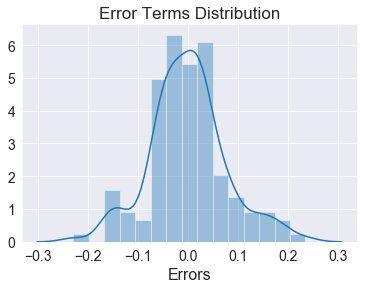

In [107]:
# Plot the histogram of the error terms
fig = plt.figure()

#Plotting Distribution plot to see if error terms are normally distributed
sns.distplot((y_train - y_train_pred))
#Setting labels and titles
plt.title('Error Terms Distribution',fontsize=17)                  
plt.xlabel('Errors',fontsize=16)  
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Insights
1. Error terms are normally Distributed with mean close to 0
2. Assumptions of linear regression hold

# Predictions

In [108]:
#Creating a final X_train dataframe with no constant
X_train_final=X_train_sm.drop("const",axis=1)

In [109]:
#Scaling test data set
test_df[numcols]=scaler.transform(test_df[numcols])
#Creating X and Y for test set
y_test=test_df.pop("price")
X_test=test_df

In [110]:
#Keeping only those columns in X_test that we used for final model
X_test=X_test[list(X_train_final.columns)]

In [111]:
#Adding constant term in test set because we are using statsmodule
X_test_sm=sm.add_constant(X_test)

#Predicting value
y_test_pred=lm.predict(X_test_sm)

# Model Evaluation

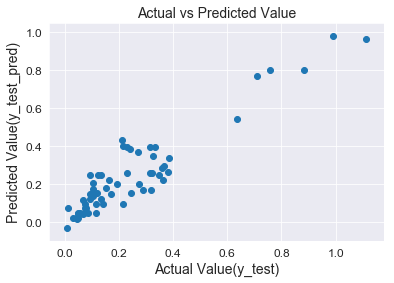

In [112]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()

#Plotting scatter plot
plt.scatter(x=y_test,y=y_test_pred)
#Setting title
plt.title("Actual vs Predicted Value",fontsize=14)    
#Setting x and Y label
plt.xlabel('Actual Value(y_test)',fontsize=14)                          
plt.ylabel('Predicted Value(y_test_pred)',fontsize=14)     
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Visualising how predicted values cover actual value

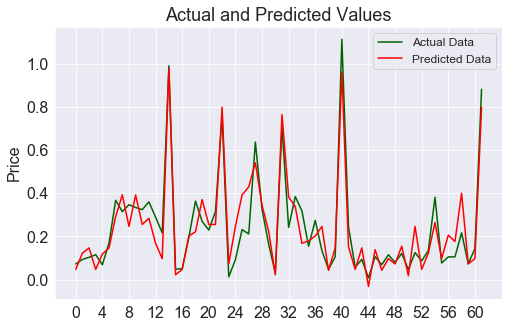

In [113]:
#Visualizing actual and predicted values of test data set

sns.set_style("darkgrid")
#Setting fugire size
plt.figure(figsize=(8,5))



#Setting X_ticks 
plt.xticks(np.arange(0, len(y_test),4))

#plotting actual test data in green
sns.lineplot(x=np.arange(0, len(y_test)), y=y_test,color="darkgreen", label="Actual Data")

#plotting pred test data in red 
sns.lineplot(x=np.arange(0, len(y_test_pred)), y=y_test_pred,color="red", label="Predicted Data")

#Xticks and yticks font size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Price",fontsize=16)
#Title
plt.title("Actual and Predicted Values",fontsize=18)
plt.legend(fontsize=12)
plt.show()

# R-Square on test Data

In [114]:
r2_score(y_test, y_test_pred)

0.8723382044734985

1. R-Square of final model is 87%.
2. We can see our test and train dataset have very similar R-Square.
3. The model above explains 87% variance of our data


# Conclusions
1. Final model includes variables enginesize,enginelocation_rear,enginetype_rotor,company_bmw,demand_rating,aspiration_turbo
2. Model Equation is 

<mark><b><i>Price=1.1 x enginesize + 0.2939 x engineloc_rear + 0.2772 x enginetype_rotor + 0.1974 x company_bmw - 0.089 x demand_rating + 0.0825 x aspiration_turbo - 0.01</b> </i></mark>

3. The equation supports our earlier hypothesis like rear engine cars are expensive,cars with turbo aspiration are costly etc.
4. Engine size is the most important factor in deciding the price of the car.
5. We also had factors carwidth,carheight but since they all were closely corellated with enginesize thus we are seeing only enginesize in our equation.But we must keep those in mind as well.
6. The demand variable has negative coefficient which supports our findings.When demand of a car is very large its price decreases.
7. The above point is evident from the graph we saw above where 1 rated cars had very high average prices and 4 rated cars had lowest average prices
8. If a car is BMW then its price will increase by .1974 units.
9. The model supports most of our findings and conclusions we arrived during EDA step